In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

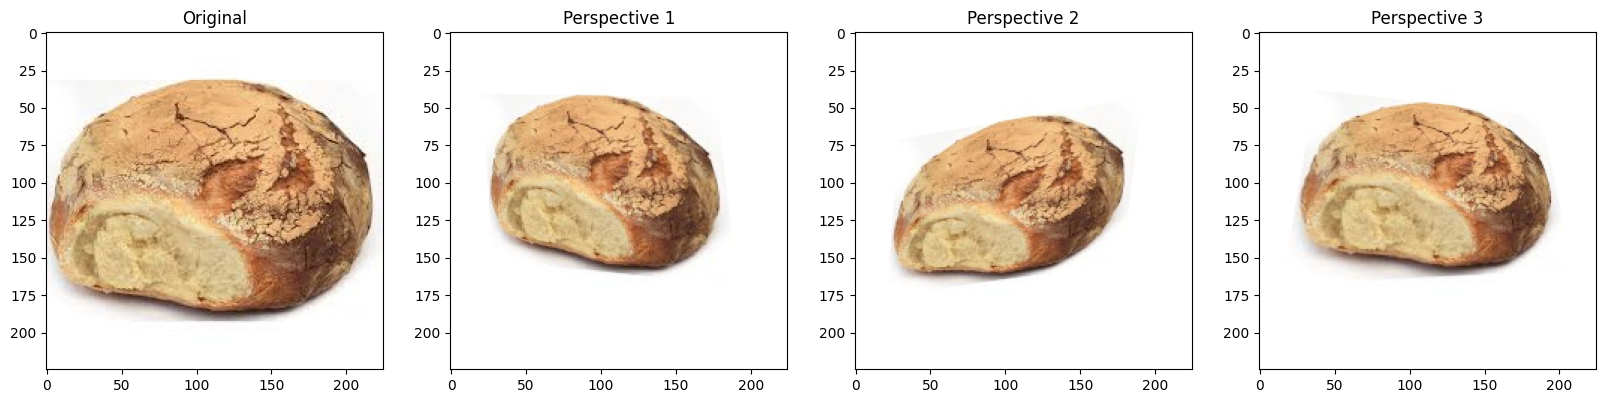

In [16]:
imBGR = cv2.imread('../img/maltese_bread.png')
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

h, w = imRGB.shape[:2]

src_pts = np.float32([[0, 0], [w, 0], [0, h], [w, h]])

dst_pts_1 = np.float32([[20, 20], [w-50, 20], [30, h-50], [w-30, h-30]])
dst_pts_2 = np.float32([[30, 50], [w-30, 20], [20, h-30], [w-50, h-50]])
dst_pts_3 = np.float32([[40, 20], [w-40, 40], [10, h-20], [w-10, h-40]])

def warp_perspective(image, src_pts, dst_pts):
    matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
    return cv2.warpPerspective(image, matrix, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

transformed_1 = warp_perspective(imRGB, src_pts, dst_pts_1)
transformed_2 = warp_perspective(imRGB, src_pts, dst_pts_2)
transformed_3 = warp_perspective(imRGB, src_pts, dst_pts_3)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(imRGB)
axes[0].set_title("Original")
axes[1].imshow(transformed_1)
axes[1].set_title("Perspective 1")
axes[2].imshow(transformed_2)
axes[2].set_title("Perspective 2")
axes[3].imshow(transformed_3)
axes[3].set_title("Perspective 3")

plt.show()
